<a href="https://colab.research.google.com/github/Durgabhavanigattu/doctor-analysis/blob/main/Doctorv_Vsit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Doctor.csv')

In [ ]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [ ]:
# viewing main info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# exploring the unique values of each column
df.nunique()

Unnamed: 0    5190
visits          10
gender           2
age             12
income          14
illness          6
reduced         15
health          13
private          2
freepoor         2
freerepat        2
nchronic         2
lchronic         2
dtype: int64

In [ ]:
# filling the bigger values with 1
df.loc[df['illness'].isin([2, 3, 4]), 'illness'] = 1

# casting type and confirming changes
df['illness'] = df['illness'].astype('bool')
df['illness'].unique()

array([ True, False])

In [ ]:
# exploring freepoor values
df['freepoor'].value_counts()

no     4968
yes     222
Name: freepoor, dtype: int64

In [ ]:
# dropping columns and validating changes
df.drop(['nchronic', 'lchronic'], axis = 1, inplace = True)
df.columns

Index(['Unnamed: 0', 'visits', 'gender', 'age', 'income', 'illness', 'reduced',
       'health', 'private', 'freepoor', 'freerepat'],
      dtype='object')

In [ ]:
df.freepoor.unique

<bound method Series.unique of 0       no
1       no
2       no
3       no
4       no
        ..
5185    no
5186    no
5187    no
5188    no
5189    no
Name: freepoor, Length: 5190, dtype: object>

In [ ]:
# viewing negative days values
df[df['reduced'] == 0 ]

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat
2,3,1,male,0.19,0.90,3,0,0,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no


In [ ]:
df['age'].describe()

count    5190.000000
mean        0.406385
std         0.204782
min         0.190000
25%         0.220000
50%         0.320000
75%         0.620000
max         0.720000
Name: age, dtype: float64

In [ ]:
# dropping these values and confirming changes
df.drop(df[df['reduced'] == 0].index, inplace = True)
df['reduced'].describe()

count    736.000000
mean       6.077446
std        5.208390
min        1.000000
25%        2.000000
50%        4.000000
75%       14.000000
max       14.000000
Name: reduced, dtype: float64

In [ ]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat
0,1,True,female,0.19,True,True,4,True,True,no,no
1,2,True,female,0.19,True,True,2,True,True,no,no
4,5,True,male,0.19,True,True,5,True,True,no,no
5,6,True,female,0.19,True,True,1,True,True,no,no
12,13,True,male,0.19,True,True,13,True,True,no,no


In [ ]:
# converting column and confirming changes
df['gender'] = df['gender'].astype('category')

df['gender'].dtypes

CategoricalDtype(categories=['female', 'male'], ordered=False)

In [ ]:
# converting columns to bool and confirming changes
cols = ['visits', 'income', 'private', 'health', 'illness']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

visits     bool
income     bool
private    bool
health     bool
illness    bool
dtype: object

In [ ]:
# viewing rows with values of illness>0.5
df[df['illness'] > 0.5]

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat
0,1,True,female,0.19,True,True,4,True,True,no,no
1,2,True,female,0.19,True,True,2,True,True,no,no
4,5,True,male,0.19,True,True,5,True,True,no,no
5,6,True,female,0.19,True,True,1,True,True,no,no
12,13,True,male,0.19,True,True,13,True,True,no,no
...,...,...,...,...,...,...,...,...,...,...,...
4989,4990,False,male,0.57,True,True,2,False,True,no,no
5062,5063,False,female,0.67,True,True,1,False,True,no,no
5063,5064,False,female,0.67,True,True,2,False,True,no,yes
5071,5072,False,male,0.67,True,True,7,True,True,no,no


In [ ]:
# dropping row with negative age and confirming changes
df.drop(df[df['age'] < 0].index, inplace = True)
df[df['age'] < 0]

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat


In [ ]:
# setting seaborn configurations
sns.set_style("whitegrid")

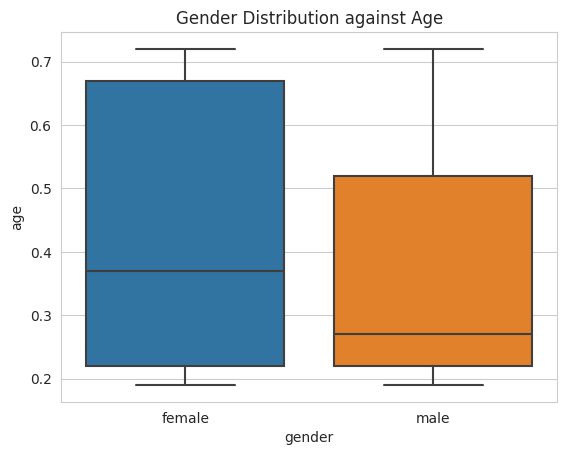

In [ ]:
# viewing count plot of gender distribution against age in our dataset
sns.boxplot(x = 'gender', y = 'age', data = df)
plt.title("Gender Distribution against Age")
plt.show()

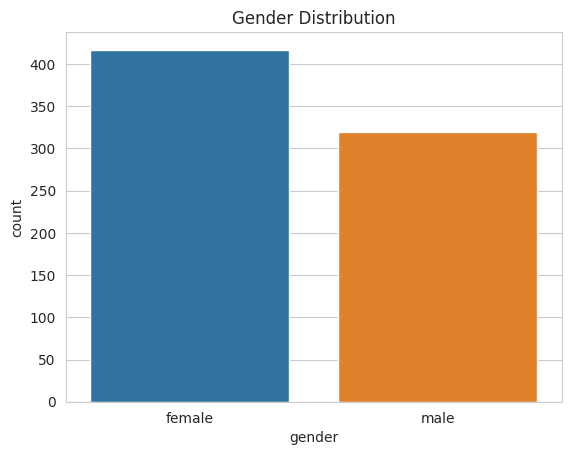

In [ ]:
sns.countplot(x = 'gender', data = df)
plt.title("Gender Distribution")
plt.show()

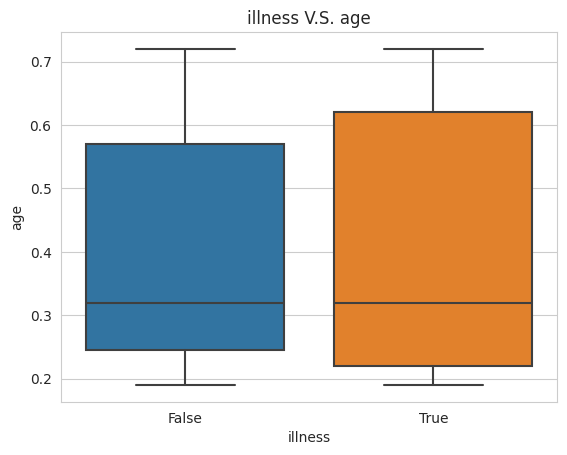

In [ ]:
# plotting having a scholarship against age
sns.boxplot(x = 'illness', y = 'age', data = df)
plt.title('illness V.S. age')
plt.show()

In [ ]:
df['freerepat'].value_counts()

no     578
yes    158
Name: freerepat, dtype: int64

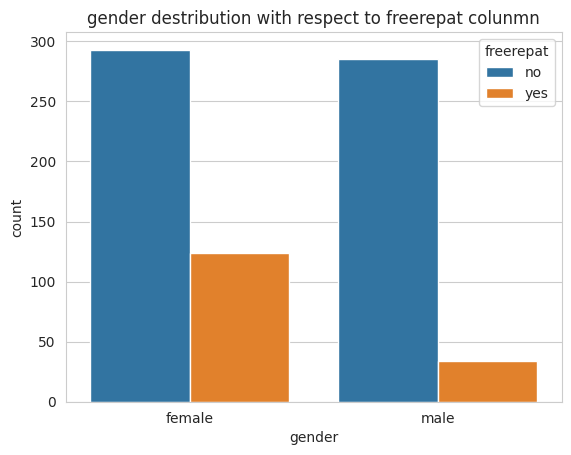

In [ ]:
# showing the gender destribution with respect to the freerepat colunmn
sns.countplot(x = 'gender', data = df, hue = 'freerepat')
plt.title('gender destribution with respect to freerepat colunmn')
plt.show()

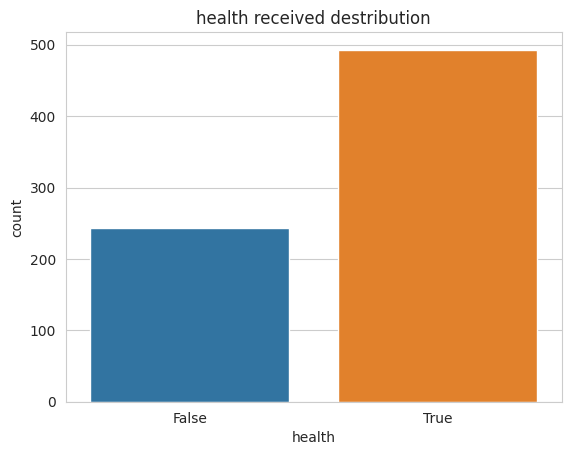

In [ ]:
# viewing count plot of recieving health distribution in our dataset
sns.countplot(x = 'health', data = df)
plt.title("health received destribution")
plt.show()

In [ ]:
df['health'].value_counts()

True     493
False    243
Name: health, dtype: int64

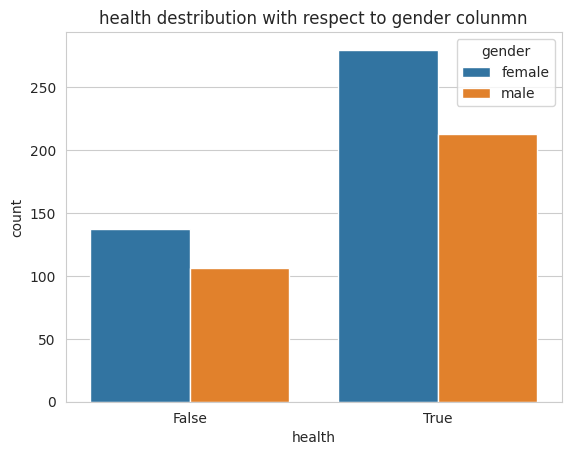

In [ ]:
# showing the health destribution with respect to the gender colunmn
sns.countplot(x = 'health', data = df, hue = 'gender')
plt.title('health destribution with respect to gender colunmn')
plt.show()

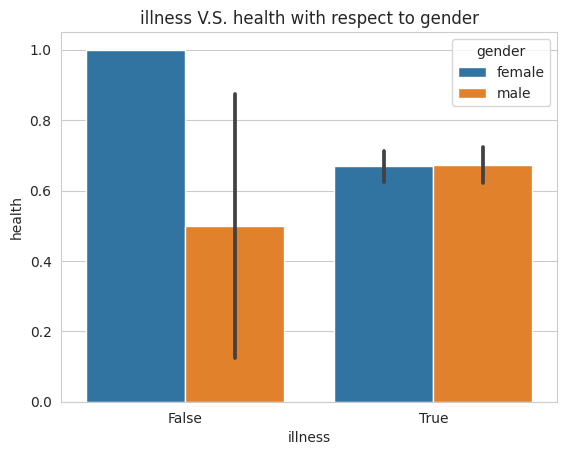

In [ ]:
# plotting having a illness against health with respect to gender
sns.barplot(x = 'illness', y = 'health', hue = 'gender', data = df)
plt.title('illness V.S. health with respect to gender')
plt.show()

<Axes: >

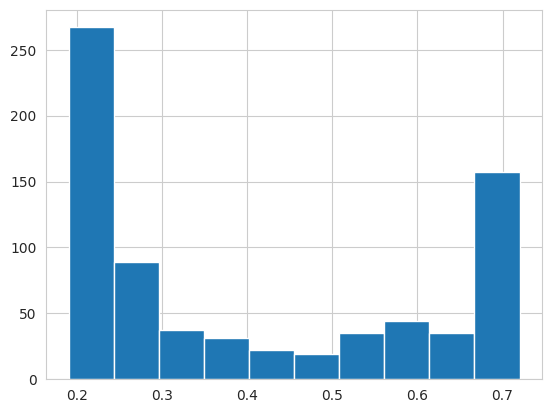

In [ ]:
# ploting age destribution
df['age'].hist()

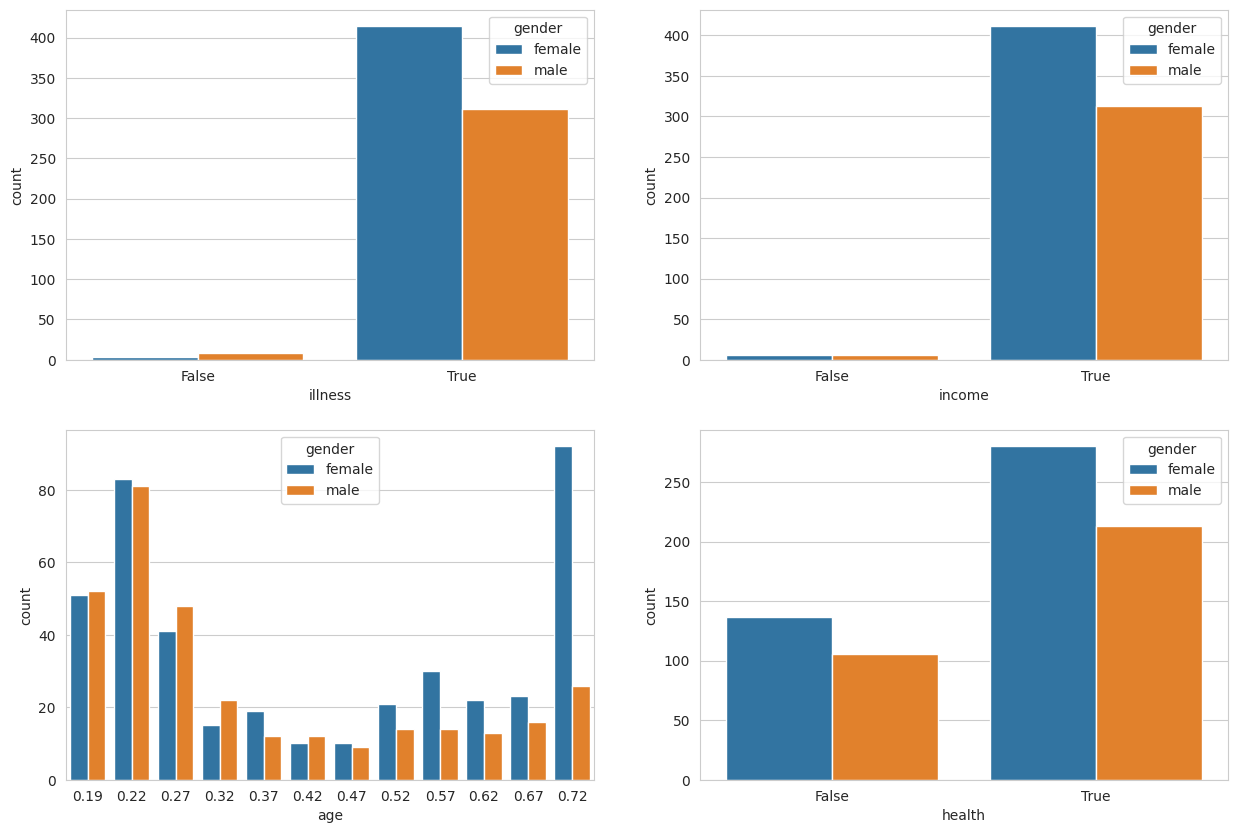

In [ ]:
# plotting deseases against no show
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'illness', data = df, hue= 'gender')
plt.subplot(2,2,2)
sns.countplot(x = 'income', data = df, hue= 'gender')
plt.subplot(2,2,3)
sns.countplot(x = 'age', data = df, hue= 'gender')
plt.subplot(2,2,4)
sns.countplot(x = 'health', data = df, hue= 'gender')
plt.show()